# Intro 

An often misunderstood and not often talked about issue is mental health. Most companies don’t provide mental health with their insurance coverage and often doesn’t show up when mentioning health problems in the US. Mental health affects a large portion of the population and interferes with their daily lives so a question to ask is how it affects their work schedule. From the data provided from multiple data sources we show find out how mental health affects workers within the tech industry, what causes it, some identifiers to show some demographic data about mental health and then find out how much it costs the productivity in that field. 

In [2]:
#Import the needed packages for analysis and visulization

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [4]:
#Load and create df
df = pd.read_csv('C:/Users/JR/Documents/Data Science Class/Capstone 2/Data/survey.csv')

In [5]:
#check to see if Data frame is available and basic info about data
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

The data seems to be in order so we can move on to cleaning, analysis, and visulization of the data.

# Data Analysis and Visulization

In [12]:
#Clean Data to be used for Analysis 
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
def age_process(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
df['Age'] = df['Age'].apply(age_process)

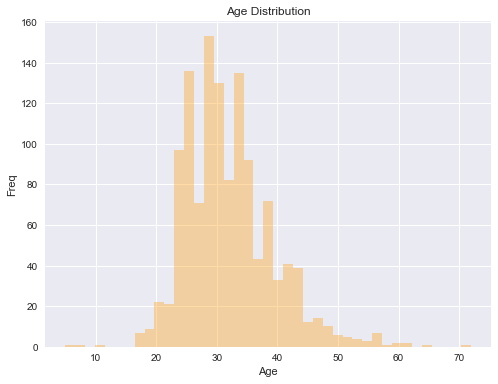

In [15]:
fig,ax = plt.subplots(figsize=(8,6))
sns.distplot(df['Age'].dropna(),ax=ax,kde=False,color='#ffa726')
plt.title('Age Distribution')
plt.ylabel('Freq')

From this we can see that mental health seems to affect those that are younger more than the older work force. and most are younger than 36.

In [17]:
s="Mean Age : " +str(df['Age'].describe())
print(s)

Mean Age : count    1254.000000
mean       32.019139
std         7.375005
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64


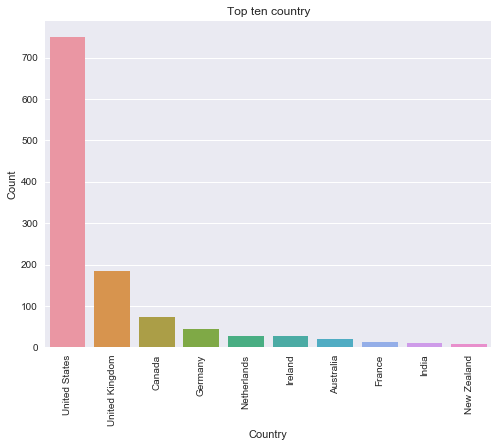

In [11]:
country_count = Counter(df['Country'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

with the graphs we can see the distrubtion of people affected by mental health issues and the top 10 countries that are affected the most by it, by seeing that the US is the highest by leaps and bounds and precursory knowledge that mental health care is lacking in that regard an area for further investigation is to look at how coverage can affect the rates of mental health. This also means that this study is largely US focused.

In [13]:
#Cleaning Data for further use
df['Timestamp'] = pd.to_datetime(df['Timestamp'],format='%Y-%m-%d')
df['Year'] = df['Timestamp'].apply(lambda x:x.year)

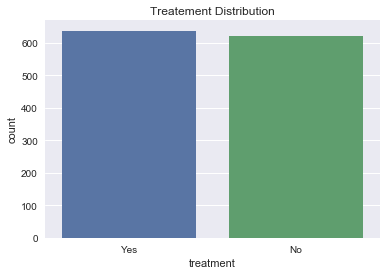

In [12]:
sns.countplot(df['treatment'])
plt.title('Treatement Distribution')

In [14]:
#cleaning Data to make age groups for treatment analysis 
df['Age_Group'] = pd.cut(df['Age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

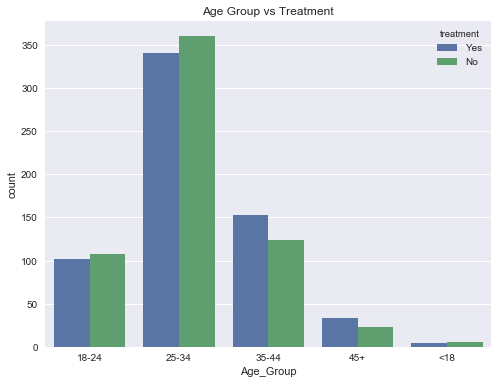

In [16]:
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = df,x = 'Age_Group', hue='treatment')
plt.title('Age Group vs Treatment')

From the two graphs we can see that about 50% of people seek treatment if they have a mental health problem. we can also see that younger workers don't seek treatment compared to the older workers who do. Lets move on from looking at age into looking at gender.

In [20]:
#Cleaning Data to make sure genders are easily defined.
male = ['Male ', 'male', 'male ', 'M', 'm', 'make', 'man', 'cis man', 'malr', 'mail', 'mal', 'Make', 'Male', 'Cis Male', 'Cis Man', 'Male (CIS)', 'male (cis)', 'Mal', 'ostensibly male, unsure what that really means', 'cis male', 'Malr', 'maile', 'msle', 'Mail', 'Man']
female = ['Female', 'female', 'female ', 'femake', 'cis female', 'F', 'f', 'Woman', 'Female ', 'cis-female/femme', 'Femake', 'Cis Female', 'femail', 'woman', 'Female (cis)', 'female (cis)']
trans_other = ['Nah','non-binary','Male-ish','trans-female','queer','Guy (-ish) ^_^','enby','Androgyne','neuter','queer/she/they','nah','Agender','Genderqueer','male leaning androgynous','fluid','trans woman','Female (trans)',"Trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "Enby", "fluid", "genderqueer", "Androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "Trans woman", "Neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]

In [21]:
df.Gender = df.Gender = df.Gender.replace(male, 'male')
df.Gender = df.Gender.replace(female, 'female')
df.Gender = df.Gender.replace(trans_other, 'trans/other')

df['Gender'].value_counts()

male                  991
female                247
trans/other            18
A little about you      1
All                     1
p                       1
Name: Gender, dtype: int64

In [25]:
gender_male = df[df.Gender == 'male']
gender_female = df[df.Gender == 'female']
gender_trans = df[df.Gender == 'trans/other']

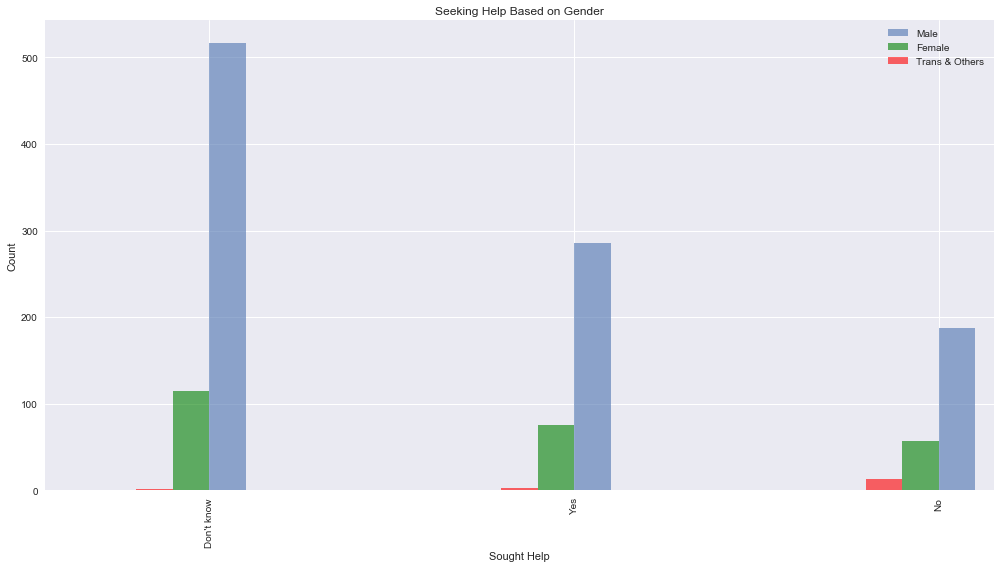

In [26]:
ax = gender_male['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Male', width=0.1, position = 0);
ax = gender_female['seek_help'].value_counts().plot(kind='bar', figsize = (14,8), alpha = 0.6, label = 'Female', width=0.1, position = 1, color = 'g');
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.1, position = 2, title='Seeking Help Based on Gender')

ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

Unsuprisingly more men than women show up in a survey involving tech but what is more intresting is that women are likely to seek help/treatment for mental health issues then men.

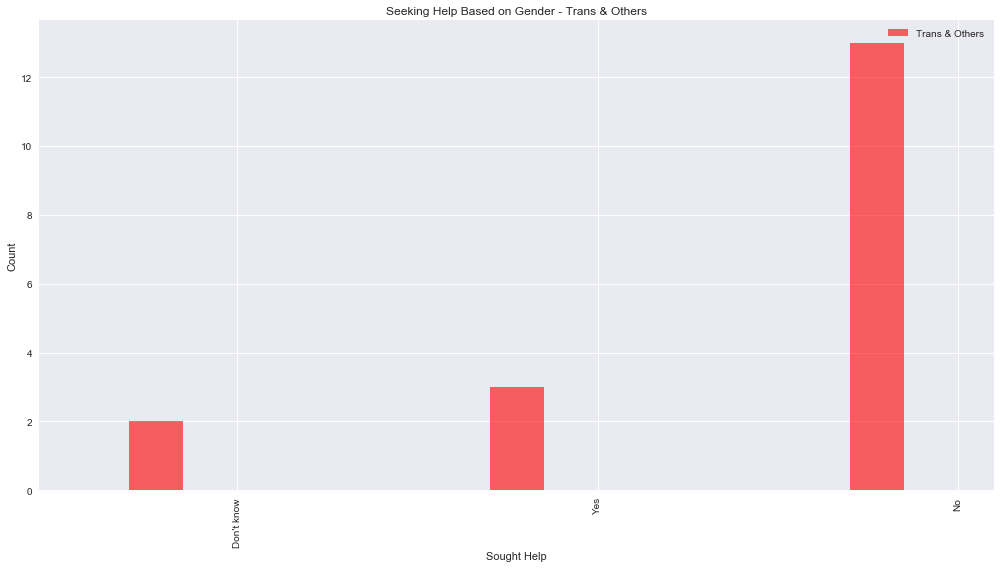

In [27]:
ax = gender_trans['seek_help'].value_counts().sort_values(ascending=True).plot(kind='bar', figsize = (14,8), alpha = 0.6, color = 'r', label = 'Trans & Others', width= 0.15, position = 2, title='Seeking Help Based on Gender - Trans & Others')
ax.set_xlabel("Sought Help")
ax.set_ylabel("Count")
plt.tight_layout()
plt.legend();

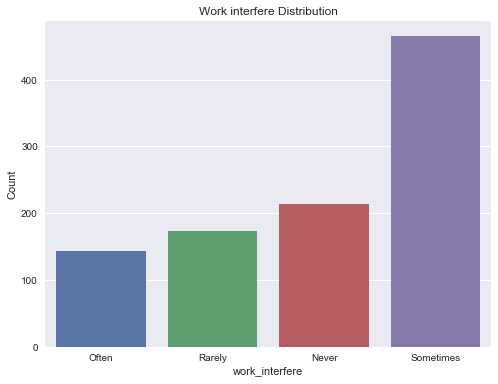

In [17]:
fig,ax  =plt.subplots(figsize=(8,6))
sns.countplot(df['work_interfere'].dropna(),ax=ax)
plt.title('Work interfere Distribution')
plt.ylabel('Count')

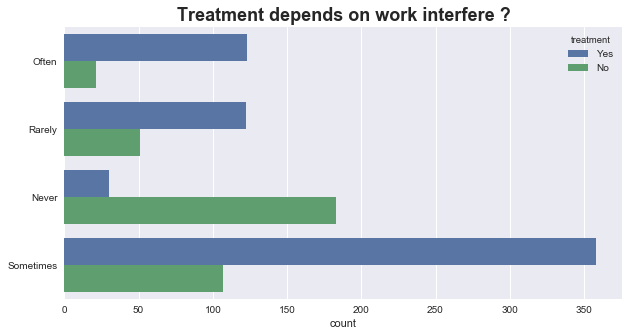

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(y="work_interfere", hue="treatment", data=df)
plt.title("Treatment depends on work interfere ?",fontsize=18,fontweight="bold")
plt.ylabel("")
plt.show()

After showing the trans values a little closer we can see that they are less likely to seek treatment than the other genders as well. then seeing it based on work interference values and then seeing that overall as the mental health issues worsen they are more likely to seek help/treatment. Does providing coverage help with that.

In [1]:
#define function for simple crosstab values
def renameCol(col,name):
    df1=df.rename(columns={col:name})
    return df1[name]

In [6]:
treatmentDf=renameCol("treatment",'Have you sought treatment for a mental health condition?')

In [7]:
#benefits: Does your employer provide mental health benefits?
benfitsdf=renameCol("benefits",'Does your employer provide mental health benefits?')
tab=pd.crosstab(benfitsdf,treatmentDf,normalize = "index")
tab

Have you sought treatment for a mental health condition?,No,Yes
Does your employer provide mental health benefits?,,
Don't know,0.629902,0.370098
No,0.516043,0.483957
Yes,0.360587,0.639413


From this we can see that over 69% do not know if they provide coverage for mental health and that if they are provided mental health coverage they are more likely to seek treatment with a difference being 15%

In [8]:
# does anonymity make it easier
anonymitydf=renameCol("anonymity",' Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?')
tab=pd.crosstab(anonymitydf,treatmentDf,normalize = "index")
tab

Have you sought treatment for a mental health condition?,No,Yes
Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,,
Don't know,0.547009,0.452991
No,0.415385,0.584615
Yes,0.392000,0.608000


people are more likely to seek treatment if it is anonymous.

# Machine Learning to Find Predictors

Since we are trying to find the most likely predictors of mental health and the data has classifiers a logistic regression is the best model to use for prediction.

## Initial Cleaning of the data so ML can be used.

In [38]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                           Total   Percent
comments                    1095  0.869738
self_employed                 18  0.014297
Age                            5  0.003971
phys_health_interview          0  0.000000
mental_health_interview        0  0.000000
Gender                         0  0.000000
mental_vs_physical             0  0.000000
family_history                 0  0.000000
treatment                      0  0.000000
no_employees                   0  0.000000
remote_work                    0  0.000000
tech_company                   0  0.000000
benefits                       0  0.000000
care_options                   0  0.000000
wellness_program               0  0.000000
obs_consequence                0  0.000000
anonymity                      0  0.000000
leave                          0  0.000000
mental_health_consequence      0  0.000000
phys_health_consequence        0  0.000000
coworkers                      0  0.000000
supervisor                     0  0.000000
seek_help  

In [40]:
#Let’s get rid of the variable “comments”, just to make our lives easier.
train_df = df.drop(['comments'], axis= 1)
print(train_df.head())

    Age  Gender self_employed family_history treatment    no_employees  \
0  37.0  Female           NaN             No       Yes            6-25   
1  44.0       M           NaN             No        No  More than 1000   
2  32.0    Male           NaN             No        No            6-25   
3  31.0    Male           NaN            Yes       Yes          26-100   
4  31.0    Male           NaN             No        No         100-500   

  remote_work tech_company    benefits care_options       ...        \
0          No          Yes         Yes     Not sure       ...         
1          No           No  Don't know           No       ...         
2          No          Yes          No           No       ...         
3          No          Yes          No          Yes       ...         
4         Yes          Yes         Yes           No       ...         

    anonymity               leave mental_health_consequence  \
0         Yes       Somewhat easy                        No   
1 

In [41]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'
defaultFloat = 0.0

# Create lists by data tpe
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']
floatFeatures = []

# Clean the NaN's
for feature in train_df:
    if feature in intFeatures:
        train_df[feature] = train_df[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        train_df[feature] = train_df[feature].fillna(defaultString)
    elif feature in floatFeatures:
        train_df[feature] = train_df[feature].fillna(defaultFloat)
    else:
        print('Error: Feature %s not recognized.' % feature)
train_df.head(5)  

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37.0,Female,NaN,No,Yes,6-25,No,Yes,Yes,Not sure,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44.0,M,NaN,No,No,More than 1000,No,No,Don't know,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32.0,Male,NaN,No,No,6-25,No,Yes,No,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31.0,Male,NaN,Yes,Yes,26-100,No,Yes,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31.0,Male,NaN,No,No,100-500,Yes,Yes,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [43]:
#clean 'Gender' again
#Slower case all columm's elements
gender = train_df['Gender'].str.lower()
#print(gender)

#Select unique elements
gender = train_df['Gender'].unique()

#Made gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

for (row, col) in train_df.iterrows():

    if str.lower(col.Gender) in male_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)

    if str.lower(col.Gender) in female_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        train_df['Gender'].replace(to_replace=col.Gender, value='trans', inplace=True)

#Get rid of bullshit
stk_list = ['A little about you', 'p']
train_df = train_df[~train_df['Gender'].isin(stk_list)]

print(train_df['Gender'].unique())

['female' 'male' 'trans']


In [42]:
#complete missing age with mean
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)

In [44]:
#There are only 0.014% of self employed so let's change NaN to NOT self_employed
#Replace "NaN" string from defaultString
train_df['self_employed'] = train_df['self_employed'].replace([defaultString], 'No')
print(train_df['self_employed'].unique())

['No' 'Yes']


In [47]:
# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler


In [49]:
#Encoding data
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
label_Gender [0, 1, 2]
label_self_employed [0, 1]
label_family_history [0, 1]
label_treatment [0, 1]
label_no_employees [0, 1, 2, 3, 4, 5]
label_remote_work [0, 1]
label_tech_company [0, 1]
label_benefits [0, 1, 2]
label_care_options [0, 1, 2]
label_wellness_program [0, 1, 2]
label_seek_help [0, 1, 2]
label_anonymity [0, 1, 2]
label_leave [0, 1, 2, 3, 4]
label_mental_health_consequence [0, 1, 2]
label_phys_health_consequence [0, 1, 2]
label_coworkers [0, 1, 2]
label_supervisor [0, 1, 2]
label_mental_health_interview [0, 1, 2]
label_phys_health_interview [0, 1, 2]
label_mental_vs_physical [0, 1, 2]
label_obs_consequence [0, 1]


In [50]:
#missing data
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)


                           Total  Percent
obs_consequence                0      0.0
mental_vs_physical             0      0.0
Gender                         0      0.0
self_employed                  0      0.0
family_history                 0      0.0
treatment                      0      0.0
no_employees                   0      0.0
remote_work                    0      0.0
tech_company                   0      0.0
benefits                       0      0.0
care_options                   0      0.0
wellness_program               0      0.0
seek_help                      0      0.0
anonymity                      0      0.0
leave                          0      0.0
mental_health_consequence      0      0.0
phys_health_consequence        0      0.0
coworkers                      0      0.0
supervisor                     0      0.0
mental_health_interview        0      0.0
phys_health_interview          0      0.0
Age                            0      0.0


In [51]:
# Scaling Age
scaler = MinMaxScaler()
train_df['Age'] = scaler.fit_transform(train_df[['Age']])
train_df.head()

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0.468085,0,0,0,1,4,0,1,2,1,...,2,2,1,1,1,2,1,0,2,0
1,0.617021,1,0,0,0,5,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0.361702,1,0,0,0,4,0,1,1,0,...,0,1,1,1,2,2,2,2,1,0
3,0.340426,1,0,1,1,2,0,1,1,2,...,1,1,2,2,1,0,0,0,1,1
4,0.340426,1,0,0,0,1,1,1,2,0,...,0,0,1,1,1,2,2,2,0,0


In [53]:
# define X and y
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave']
X = train_df[feature_cols]
y = train_df.treatment

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()

In [55]:
from sklearn.linear_model import LogisticRegression
def logisticRegression():
    # train a logistic regression model on the training set
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    
    # make class predictions for the testing set
    y_pred_class = logreg.predict(X_test)

In [57]:
pipe_lr = Pipeline([('scl', StandardScaler()),
            ('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(penalty='l2', C = 10000, random_state=1))])

In [58]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr, 
                         X=X_train, 
                         y=y_train, 
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)
print('mean CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy scores: [ 0.62921348  0.67045455  0.75        0.60227273  0.77272727  0.64772727
  0.67045455  0.70454545  0.67816092  0.57471264]
mean CV accuracy: 0.670 +/- 0.058


In [60]:
from sklearn.model_selection import learning_curve
#Now change the logistic regression to no PCA to counter high bias
pipe_lr = Pipeline([('scl', StandardScaler()),
            #('pca', PCA(n_components=2)),
            ('clf', LogisticRegression(penalty='l2', random_state=1))])

train_sizes, train_scores, cv_scores =\
                learning_curve(estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                train_sizes=np.linspace(0.1, 1.0, 10), 
                cv=10,
                n_jobs=1)

In [61]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
cv_mean = np.mean(cv_scores, axis=1)
cv_std = np.std(cv_scores, axis=1)

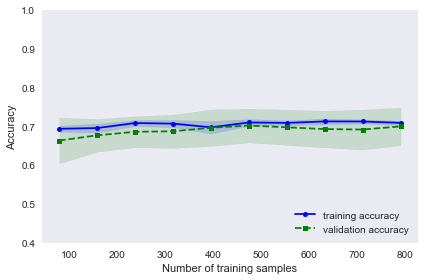

In [62]:
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(train_sizes, cv_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(train_sizes, 
                 cv_mean + cv_std,
                 cv_mean - cv_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.4, 1.0])
plt.tight_layout()

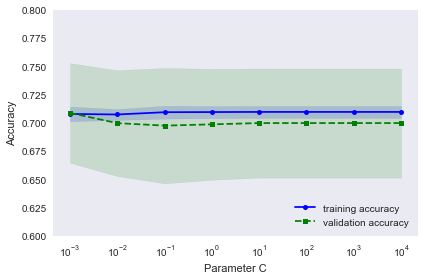

In [63]:
from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='clf__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.6, 0.8])
plt.tight_layout()
# plt.savefig('./figures/validation_curve.png', dpi=300)
plt.show()

In [69]:
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'clf__C': param_range}]

#this bit is the inner loop
gs = GridSearchCV(estimator=pipe_lr, 
                            param_grid=param_grid, #this bit does the grid search of the parameter space i.e. linear/rbf and parameter tuning
                            scoring='accuracy', 
                            cv=2,
                            n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.707622298066
{'clf__C': 0.01}


In [70]:
from sklearn.tree import DecisionTreeClassifier
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                            param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}], 
                            scoring='accuracy', 
                            cv=2)
scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

CV accuracy: 0.680 +/- 0.030
0.682593856655
{'max_depth': 3}


In [71]:
from sklearn.metrics import classification_report

In [72]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [73]:
#svc = SVC(kernel='linear',C=0.1).fit(X_train_std, y_train)
clf = LogisticRegression(C=0.01).fit(X_train_std,y_train)
y_true, y_pred = y_test, clf.predict(X_test_std)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.72      0.69      0.70       191
          1       0.70      0.72      0.71       187

avg / total       0.71      0.71      0.71       378



In [74]:
order = np.argsort(abs(clf.coef_))
lab = clf.coef_.ravel()
lab = lab[order].T.ravel()
feature_names = X_train.columns[order].ravel()

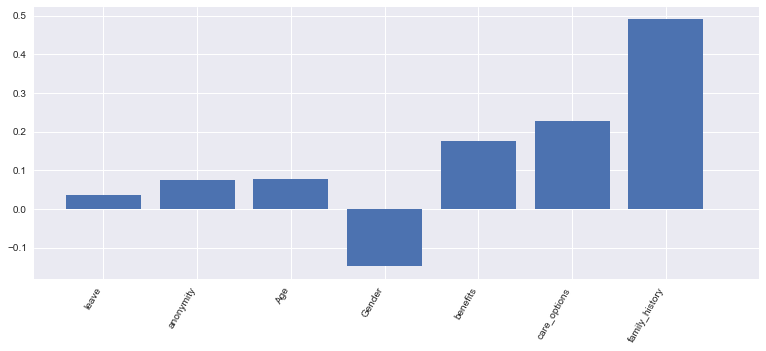

In [75]:
plt.figure(figsize=(13, 5))
plt.bar(np.arange(len(X_train.columns)),lab)
plt.xticks(np.arange(1+len(X_train.columns)),feature_names, rotation=60, ha='right')
plt.show()

# Machine Learning Conclusion

From this we see the lost likely causes of seeking mental health treatment are having a previous family history of mental issues, both benefits and care options avaliable and that increasing benefits would help lessen the issue.

# Finding the economic impact of Mental Health

In [98]:
#Accesing and loading the data 
xl_prod = pd.ExcelFile('C:/Users/JR/Documents/Data Science Class/Capstone 2/Data/Labor_and_Prod.xlsx')
xl_percent = pd.ExcelFile('C:/Users/JR/Documents/Data Science Class/Capstone 2/Data/prod3.labcmp.xlsx')
df_prod = xl_prod.parse('DATA')
df_prod.head()

,country,variable,description,code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AUS,CAP,"Crop and animal production, hunting and relate...",A01,9739.77,13729.03,9726.30,11808.62,11163.98,12429.90,8706.66,11227.29,12556.71,13768.79,18441.27,20106.04,19659.28,18986.06,20525.22
1,AUS,CAP,Forestry and logging,A02,582.69,740.04,540.79,651.96,649.34,676.64,549.27,616.70,716.86,749.91,894.94,923.40,1001.44,1247.96,1206.44
2,AUS,CAP,Fishing and aquaculture,A03,869.31,1122.29,652.69,1024.72,1059.83,923.46,904.15,863.98,1146.37,1108.94,1116.14,1213.94,1182.11,1388.98,1475.22
3,AUS,CAP,Mining and quarrying,B,28250.15,28932.78,28377.38,26027.40,37313.82,54412.79,63297.39,67706.72,96683.63,76648.61,110194.37,106946.58,87566.74,100888.01,79601.17
4,AUS,CAP,"Manufacture of food products, beverages and to...",C10-C12,6401.86,6680.15,7409.88,8544.95,8260.00,8518.42,8543.24,9302.61,9580.32,9498.97,9565.67,9321.31,8989.36,9808.71,9928.13


In [99]:
df_percent = xl_percent.parse(1, skiprows=1)
df_percent.head()

,Unnamed: 0,1987,1988,1989,1990,1991,1992,1993,1994,1995,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,"Farm Sector (111,112)",92.956,92.802,93.070,92.734,93.473,94.094,93.907,95.186,95.379,...,97.510,97.108,98.797,100.0,98.366,96.996,97.467,98.037,96.908,99.284
1,"Forestry, Fishing, and Related Activities (113...",94.087,94.409,93.939,94.388,94.685,91.993,92.631,94.378,94.050,...,96.881,97.304,98.732,100.0,98.754,97.896,98.270,98.132,97.082,99.580
2,Oil and Gas Extraction (211),93.376,91.089,94.362,90.273,88.101,86.284,93.530,92.129,87.703,...,105.028,105.136,100.388,100.0,99.519,86.666,109.629,105.790,100.685,106.426
3,"Mining, except Oil and Gas (212)",94.402,92.152,93.638,92.353,94.365,94.911,93.654,98.358,97.995,...,96.825,98.099,99.104,100.0,97.628,99.327,101.951,103.994,99.613,99.016
4,Support Activities for Mining (213),107.893,104.894,108.715,104.026,101.723,99.973,108.973,107.926,103.179,...,94.194,94.936,96.185,100.0,98.563,94.510,95.894,99.291,98.635,103.662


Now that we have both economic datasets we need to clean them so that we can focus on the tech industry, see its growth, then see how mental health overall affects the total economic impact.

In [100]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38524 entries, 0 to 38523
Data columns (total 19 columns):
country        38524 non-null object
variable       38524 non-null object
description    38524 non-null object
code           38524 non-null object
2000           38381 non-null float64
2001           38381 non-null float64
2002           38381 non-null float64
2003           38381 non-null float64
2004           38377 non-null float64
2005           38380 non-null float64
2006           38380 non-null float64
2007           38384 non-null float64
2008           38381 non-null float64
2009           38384 non-null float64
2010           38384 non-null float64
2011           38381 non-null float64
2012           38381 non-null float64
2013           38381 non-null float64
2014           38381 non-null float64
dtypes: float64(15), object(4)
memory usage: 5.6+ MB


In [101]:
df_prod = df_prod[df_prod.country == 'USA']
df_prod.head()

,country,variable,description,code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
37628,USA,CAP,"Crop and animal production, hunting and relate...",A01,36562.03,36147.69,31620.58,52889.96,73930.93,58300.19,54008.40,63174.49,73658.84,58221.37,81956.07,120604.93,99220.86,136935.19,121739.10
37629,USA,CAP,Forestry and logging,A02,7087.51,6994.14,6859.51,6962.68,5646.44,6602.47,7876.42,6545.57,5972.84,5490.32,6971.18,6360.98,7206.20,7375.92,7899.76
37630,USA,CAP,Fishing and aquaculture,A03,2109.11,2110.42,1856.56,2165.52,1728.88,1848.36,2158.94,2367.26,2774.24,2849.07,3528.30,3570.41,3929.79,4263.28,4824.45
37631,USA,CAP,Mining and quarrying,B,73859.26,85112.97,76838.64,102338.22,125064.30,178669.32,215504.59,249440.05,327155.43,223839.59,260443.99,316163.04,318158.35,345837.49,351747.98
37632,USA,CAP,"Manufacture of food products, beverages and to...",C10-C12,91122.75,100702.09,101300.54,101391.74,97000.09,98526.83,112179.11,108820.62,113600.38,155728.87,140120.74,126746.55,135457.15,139506.16,143959.96


Using the notes provided in the sheet the variables listed that we are intrested in are EMPE or employees employed, GO which is value added and H_EMPE or hours employees work. we also need the tech industry and not all workers in the US

In [102]:
df_prod = df_prod[df_prod.code == 'J62_J63']
df_prod.head()

,country,variable,description,code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
37667,USA,CAP,"Computer programming, consultancy and related ...",J62_J63,-20314.980,2141.960,35372.710,44636.660,53794.060,48622.490,58514.820,51228.650,54759.240,57227.520,62329.120,67949.340,50489.050,55137.930,60811.580
37723,USA,COMP,"Computer programming, consultancy and related ...",J62_J63,154886.000,152487.000,132577.000,130882.000,139638.000,151059.000,166141.000,171510.000,180052.000,177452.000,187564.000,206490.000,230252.000,242166.000,263055.000
37779,USA,EMP,"Computer programming, consultancy and related ...",J62_J63,2388.685,2619.405,2736.758,2658.372,2776.804,2723.198,2866.511,2568.384,2705.458,2568.566,2608.885,2677.615,2710.227,2970.547,3175.341
37835,USA,EMPE,"Computer programming, consultancy and related ...",J62_J63,2237.349,2440.779,2537.607,2420.494,2533.113,2490.394,2646.724,2365.909,2488.180,2371.511,2412.194,2524.956,2541.160,2787.579,3014.914
37891,USA,GO,"Computer programming, consultancy and related ...",J62_J63,280364.000,281402.000,276979.000,276879.000,287506.000,307000.000,332608.000,369287.000,404176.000,398632.000,431082.000,466334.000,504928.000,527453.000,560922.000


Now we have isolated it to the US and to tech workers we can now find out the productivty the average worker creates by comparing the hours worked to the number of employees to how much the industry produced in total.

# Conclusion

We have found some of the early signs to help show when mental health issues will pop up in people within the tech industry and we have seen that using a sample set of the population that mental health affects around a 25% of the workers within the tech industry and costs around 5% of the total production meaning a loss of over 5 million dollars.